# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
previsao_renda = pd.read_csv('banco.csv')
previsao_renda = previsao_renda.set_index('index')
previsao_renda = previsao_renda.drop('Unnamed: 0', axis=1)


In [23]:
previsao = previsao_renda[['renda', 'posse_de_veiculo', 'posse_de_imovel']].copy()
previsao.head()

,renda,posse_de_veiculo,posse_de_imovel
index,,,
8682,3369.24,False,True
12830,6096.14,True,True
2885,5658.98,True,True
16168,7246.69,True,False
12438,4017.37,False,False


In [19]:
previsao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 8682 to 12895
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   renda             15000 non-null  float64
 1   posse_de_veiculo  15000 non-null  bool   
 2   posse_de_imovel   15000 non-null  bool   
dtypes: bool(2), float64(1)
memory usage: 263.7 KB


In [24]:
previsao.posse_de_veiculo = previsao.posse_de_veiculo.map({False: 'Falso', True: 'Verdadeiro'})
previsao.posse_de_imovel = previsao.posse_de_imovel.map({False: 'Nao', True: 'Sim'})
previsao.head()

,renda,posse_de_veiculo,posse_de_imovel
index,,,
8682,3369.24,Falso,Sim
12830,6096.14,Verdadeiro,Sim
2885,5658.98,Verdadeiro,Sim
16168,7246.69,Verdadeiro,Nao
12438,4017.37,Falso,Nao


In [25]:
n_meses = 3
n_clientes = 5000

datas = pd.Series(pd.date_range('1/1/2019', periods = n_meses, freq = 'MS').repeat(n_clientes))

dados = previsao.sample(n = n_meses * n_clientes, replace=True).reset_index()

previsao = pd.concat([datas, dados], axis = 1)
previsao.rename({0:'data_ref'}, inplace = True, axis = 'columns')
previsao

,data_ref,index,renda,posse_de_veiculo,posse_de_imovel
0,2019-01-01,11565,8367.73,Verdadeiro,Nao
1,2019-01-01,814,3316.92,Verdadeiro,Sim
2,2019-01-01,13987,3223.04,Verdadeiro,Sim
3,2019-01-01,8344,2266.61,Falso,Sim
4,2019-01-01,9966,2876.92,Verdadeiro,Sim
...,...,...,...,...,...
14995,2019-03-01,690,3275.01,Falso,Sim
14996,2019-03-01,9591,3425.54,Verdadeiro,Sim
14997,2019-03-01,11447,6749.00,Verdadeiro,Sim
14998,2019-03-01,1966,9301.25,Verdadeiro,Sim


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

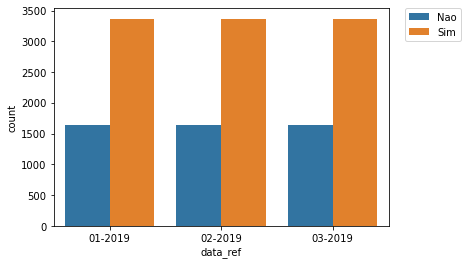

In [26]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=previsao)
tick_labs = previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(previsao['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

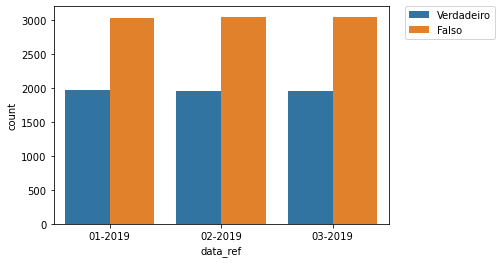

In [27]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=previsao)
tick_labs = previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(previsao['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Não houve nenhuma alterção importante nas variáveis explicativas

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

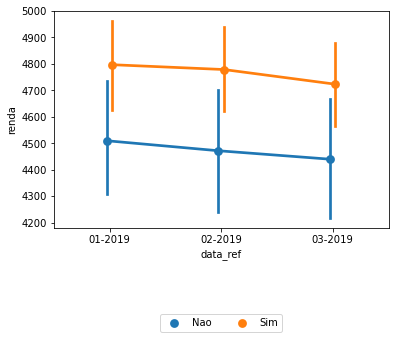

In [31]:
ax = sns.pointplot(x="data_ref", y='renda', hue='posse_de_imovel',
                   data=previsao, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3);


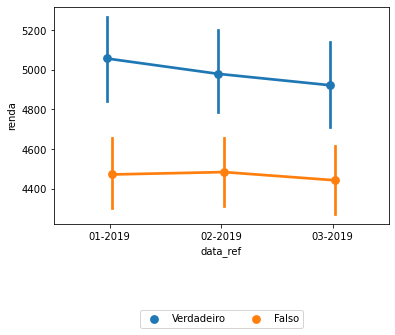

In [32]:
ax = sns.pointplot(x="data_ref", y='renda', hue='posse_de_veiculo',
                   data=previsao, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

tick_labs = previsao['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(previsao['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3);

#### Não houve uma alteração durante o tempo. As variáveis se mostram estaveis e podem ser usadas em uma modelagem futura. 